In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.model_selection import train_test_split


In [20]:
df = pd.read_csv('../data/housing.csv')

In [21]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [22]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
target = ['median_house_value']

In [23]:
df = df.dropna(subset = features + target)

In [24]:
# 60-20-20
x_tr, x_te, y_tr, y_te = train_test_split(df[features], df[target], test_size=0.4, random_state=0)
x_va, x_te, y_va, y_te = train_test_split(x_te, y_te, test_size=0.5, random_state=0)

In [25]:
# Decision Tree Classifier is a not a good model for this because we are predicting a continuous variable

In [30]:
tr = DecisionTreeRegressor(max_depth= 3, random_state=0)
tr.fit(x_tr, y_tr)
print(tr.score(x_va, y_va))
print(tr.score(x_tr, y_tr))

0.4780599324847774
0.4975374348442102


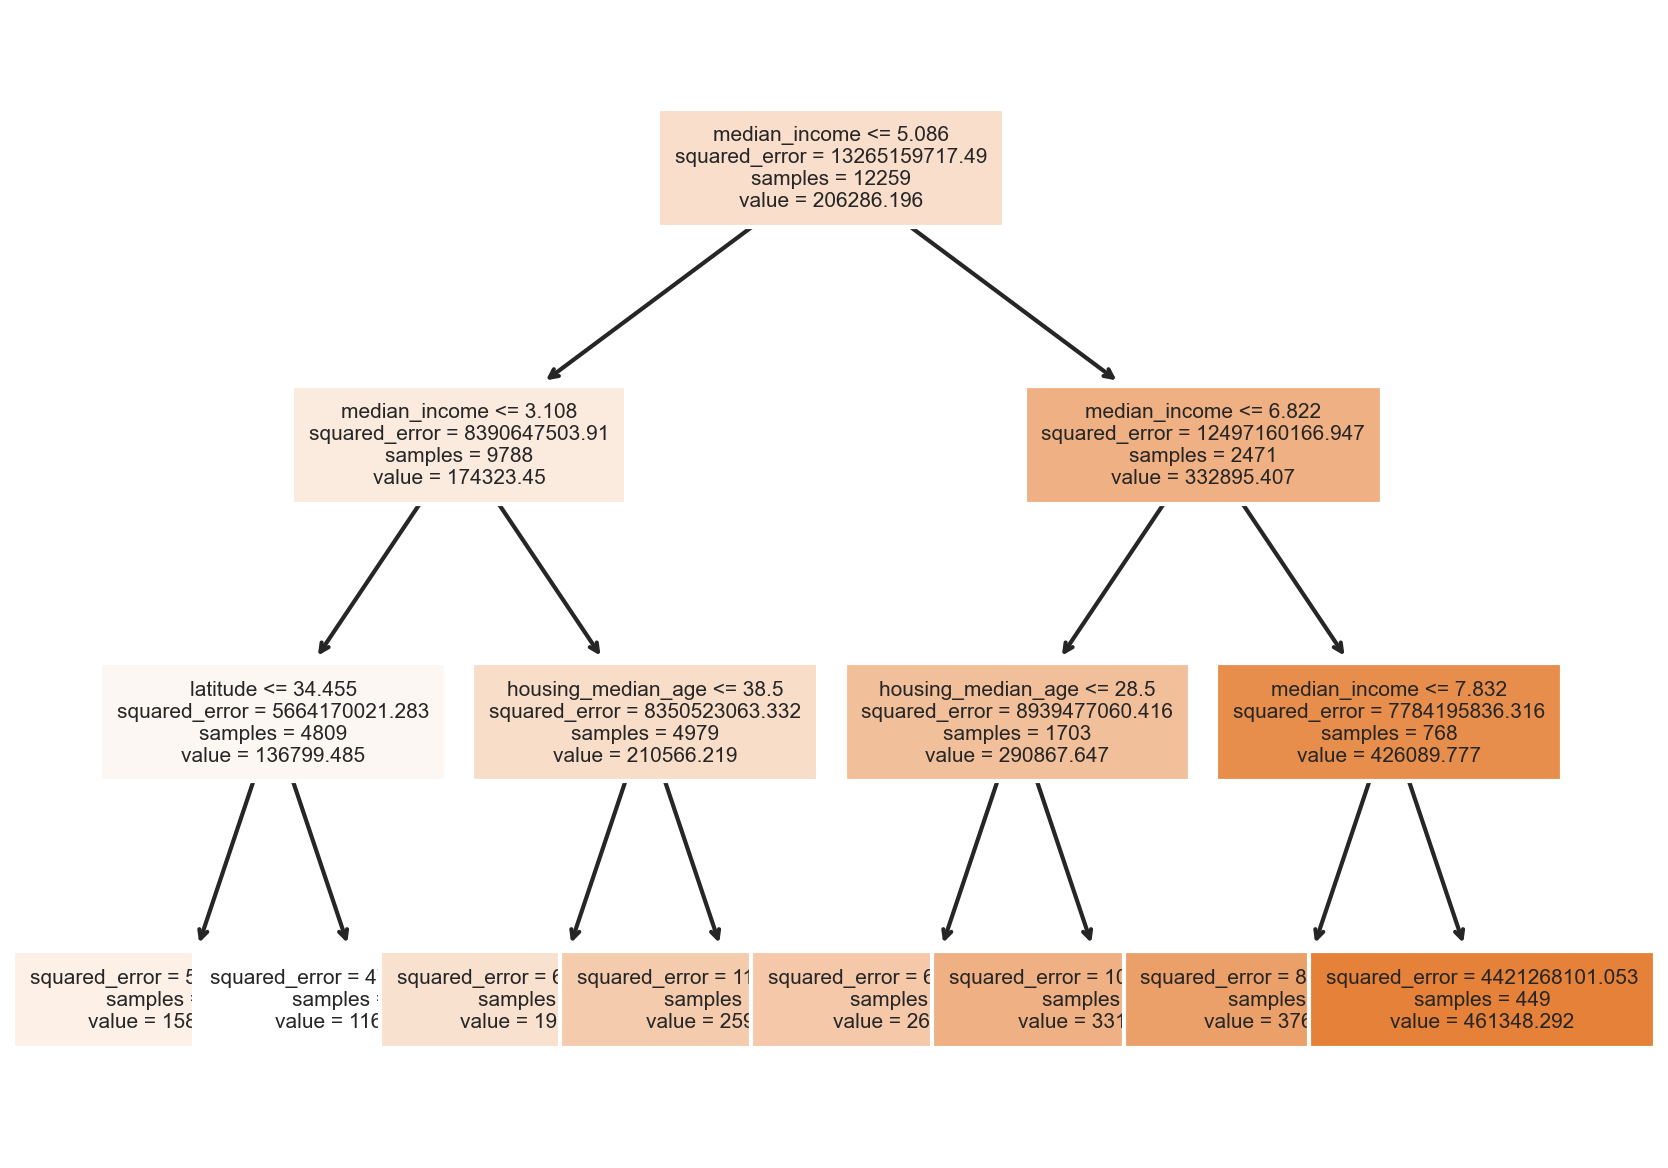

In [32]:
fig, ax = plt.subplots(dpi=300)
plot_tree(tr, filled=True, fontsize=5, feature_names=features);
# It is applying the Null model at every node where the predicted values is the average of subset/neighborhood

In [37]:
sum((y_tr['median_house_value'] - np.mean(y_tr['median_house_value']))**2)/len(y_tr)
#gives the average squared error as shown\n in line two of the tree boxes

13265159717.490282

#gives the average squared error as shown\n in line two of the tree boxes

$(y-y_{avg})^2 / len(y)$

In [38]:
# Optimize th number of layers
tr = DecisionTreeRegressor(random_state=0)
tr.fit(x_tr, y_tr)
tr.get_depth()

34

In [40]:
tr_acc = []
va_acc = []
for i in range(1,35):
       tr = DecisionTreeRegressor(max_depth=i, random_state=0)
       tr.fit(x_tr, y_tr)
       va_acc.append(tr.score(x_va, y_va))
       tr_acc.append(tr.score(x_tr, y_tr))

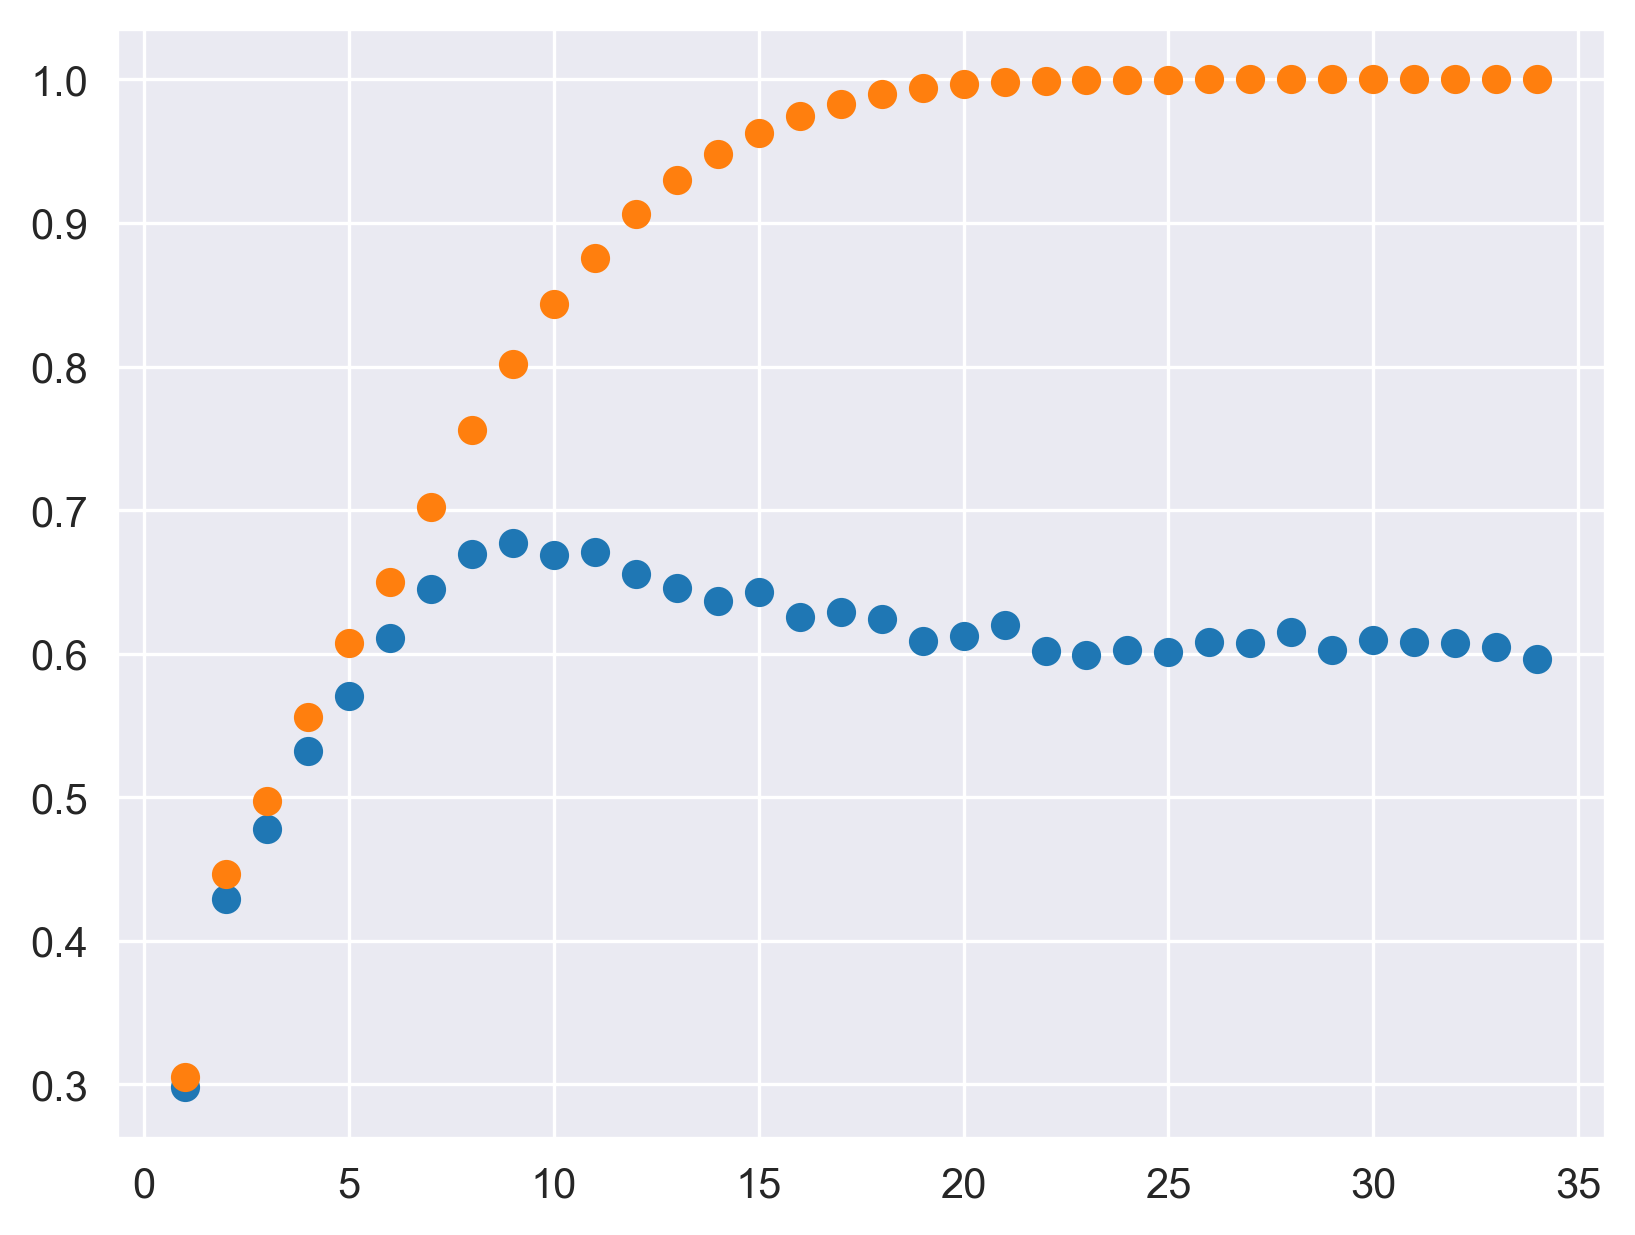

In [41]:
fig, ax = plt.subplots(dpi=300)
plt.scatter(range(1,35), va_acc)
plt.scatter(range(1,35), tr_acc)

In [43]:
tr = DecisionTreeRegressor(max_depth=9, random_state=0)
tr.fit(x_tr, y_tr)
tr.score(x_te, y_te)

0.6915261915415354